In [1]:
import requests
import json
from pprint import pprint

In [3]:
def get_info(url, find='', key=''):
    r = requests.get(url).json()
    assert r, 'empty result'
#     pprint(r)
    result = next((p for p in r if find in p[key]), None)
    assert result, f'not found string: {find}'
    return result

In [4]:
russia = {
    "value": "2a6e07c6-cc98-11e8-bdfa-f2801f1b9f01",
    "code": "TERR_RU",
    "label": "Российская Федерация",
    "parentUuid": None
}

In [5]:
region = get_info(
    url='https://epp.genproc.gov.ru/o/applications/applications/getRfSubjects', 
    find='TERR_02',
    key='code'
)

region

{'value': '0988a60f-1c25-4be6-b8c0-123456791002',
 'code': 'TERR_02',
 'label': 'Республика Башкортостан',
 'parentUuid': '0988a60f-1c25-4be6-b8c0-123456789103'}

In [6]:
type_fiz = get_info(
    url='https://epp.genproc.gov.ru/o/applications/applications/getApplicationsTypes', 
    find='Физ',
    key='label'
)

type_fiz

{'value': '1a6e07c6-cc98-11e8-bdfa-f2801f1b9fd3',
 'label': 'Физическое лицо (гражданин)',
 'legal': True}

In [7]:
kind = get_info(
    url='https://epp.genproc.gov.ru/o/applications/applications/getApplicationsKinds', 
    find='общего характера',
    key='label'
)

kind

{'value': '1a6e07c6-cc98-11e8-bdfa-f2801f1b9fd2',
 'label': 'Обращение общего характера'}

In [8]:
subject = get_info(
    url='https://epp.genproc.gov.ru/o/applications/applications/getMessageSubjects', 
    find='окружающей среды',
    key='label'
)

subject

{'value': '1a6e07c6-cc98-11e8-bdfa-f2801f1b9f17',
 'label': 'По вопросам охраны окружающей среды и природопользования',
 'description': None}

In [66]:
r = requests.get('https://epp.genproc.gov.ru/o/captcha/image/base64')
captcha_id = r.headers.get('X-CAPTCHA-ID')
image_base64 = r.content

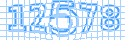

In [67]:
from IPython import display
from base64 import b64decode

display.Image(b64decode(image_base64))

In [68]:
files = {
    'form1': (None, '{"appealType":"1a6e07c6-cc98-11e8-bdfa-f2801f1b9fd3","appealKind":"1a6e07c6-cc98-11e8-bdfa-f2801f1b9fd2","lastName":"Тест","firstName":"Тест","patronymic":"Тест","organization":"","representativeFio":"","outgoingDocumentNumber":"","selectedRegions":[{"selectedRegion":"fbc0a082-441e-4844-9f2b-e4baf36f0dd7","selectedSubRegion":"75b4fe98-24d9-47dd-9469-4427880e152b"}]}'),
    'form2': (None, '{"email":"test@test.ru","phone":"+7 900 800 55 35","address":"Пушкина 101"}'),
    'form3': (None, '{"subjectType":"1a6e07c6-cc98-11e8-bdfa-f2801f1b9f01","text":"Тест"}'),
    'proc': (None, '{"level3":"1bc584a2-b0e0-4647-b69e-5c18b8b24da2","level2":"0988a60f-1c25-4be6-b8c0-123456789473","level1":"a8f5b01a-0fd8-4989-9249-42851f189878"}'),
    'captchaAnswer': (None, "12578"),
    'captchaId': (None, captcha_id),
    'timezone': (None, "5"),
    'externalUrl': (None, "http://epp.genproc.gov.ru/web/proc_02/internet-reception/personal-receptionrequest"),
    'siteId': (None, "2699603"),
    'p_auth': (None, "WOFsG1RJ")
}
headers={
    'Cookie': 'COOKIE_SUPPORT=true; EPPSID=9GGJEpMhydcQ5ZwkWqLkq4lWL6Qb8IXhBLa5_xRK.ext-liferay-01; GUEST_LANGUAGE_ID=ru_RU; sp_test=1; _ym_uid=164464938544501298; _ym_d=1644649385; _ym_isad=2; LFR_SESSION_STATE_20104=1644651186036; sputnik_session=1644652485745|0'
}

In [69]:
r = requests.post('https://epp.genproc.gov.ru/o/applications/applications/sendForm', files=files, headers=headers)
r.json()

{'requestUid': '5c68efb6-ff3d-4060-839b-4271f4c65358',
 'targetProcUuid': '1bc584a2-b0e0-4647-b69e-5c18b8b24da2',
 'targetProcTitle': 'Прокуратура Республики Башкортостан',
 'success': True,
 'error': None}